In [434]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Importing the data

In [435]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

In [436]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
test_id = df_test['PassengerId']

# Understanding the data

In [437]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [438]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [439]:
df_train.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [440]:
#See howbig the missing value are
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [441]:
#Now in the percentage 
df_train.isnull().sum()/df_train.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [442]:
#See if there's a duplicate
df_train.duplicated().sum()

0

# Visualise the data

In [443]:
import seaborn as sns
import matplotlib.pyplot as plt

In [444]:
num_cols = df_train.select_dtypes(include='number').columns
num_cols = num_cols.drop('Survived')

In [445]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

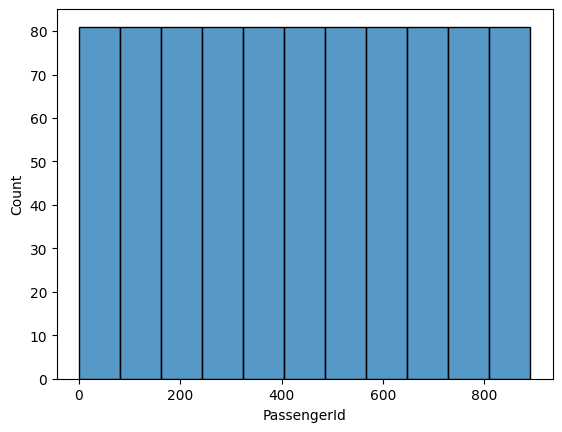

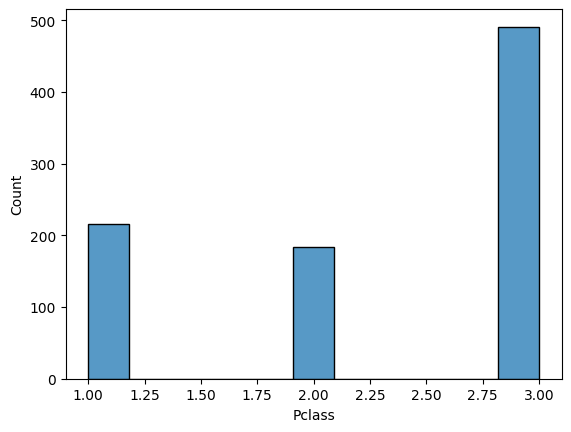

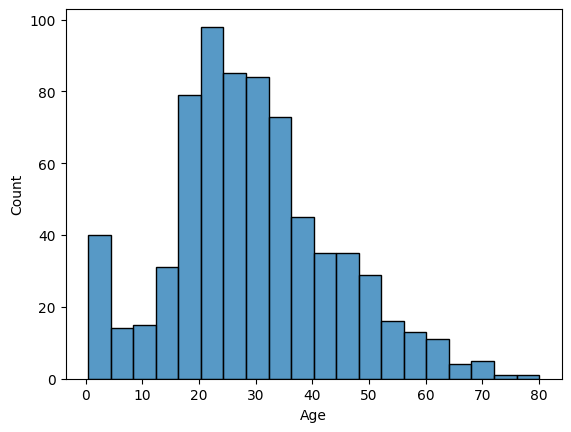

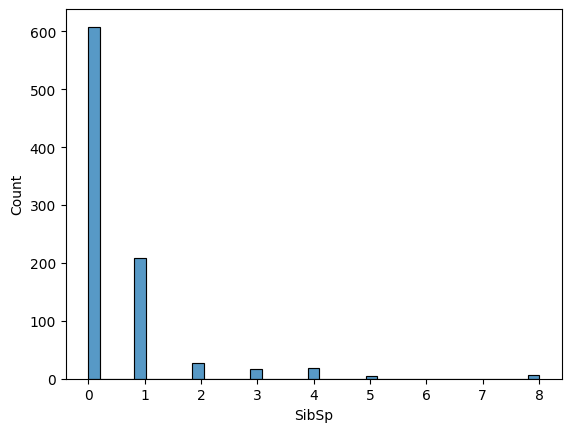

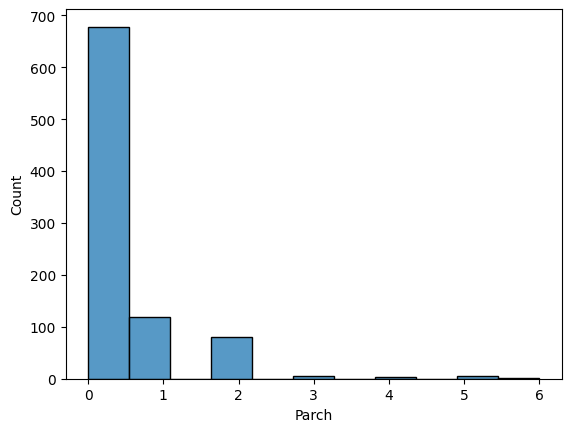

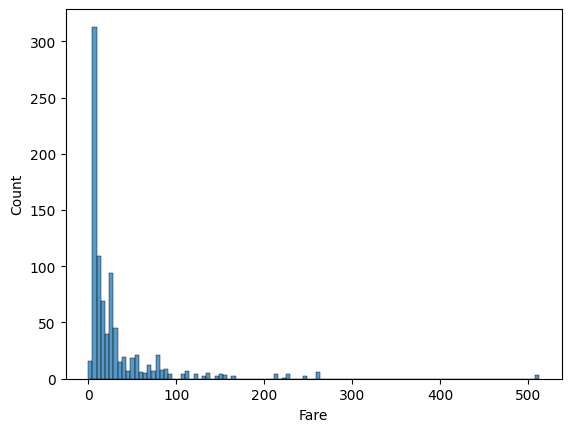

In [446]:
 for i in num_cols:
     sns.histplot(data=df_train,x=i)
     plt.show()

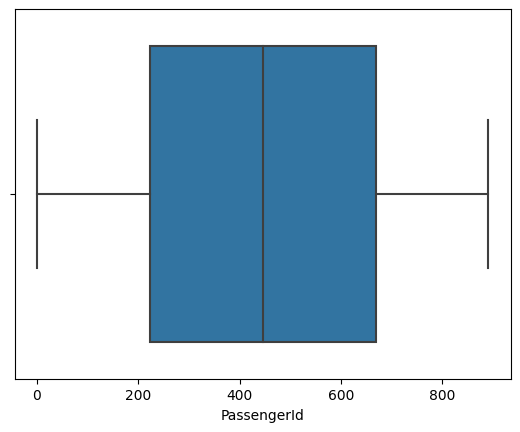

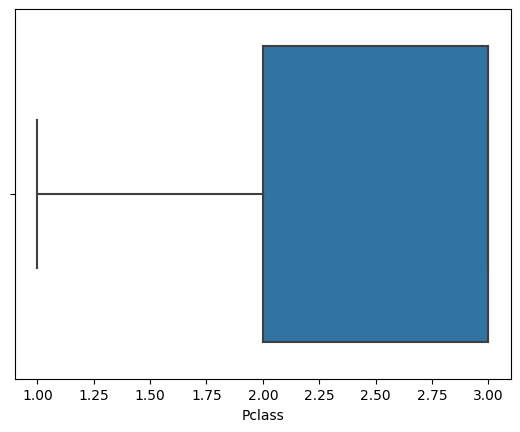

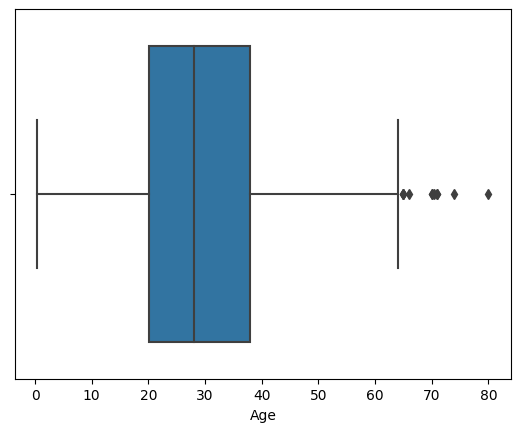

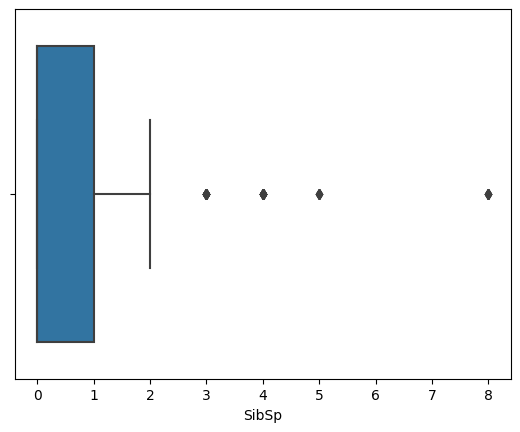

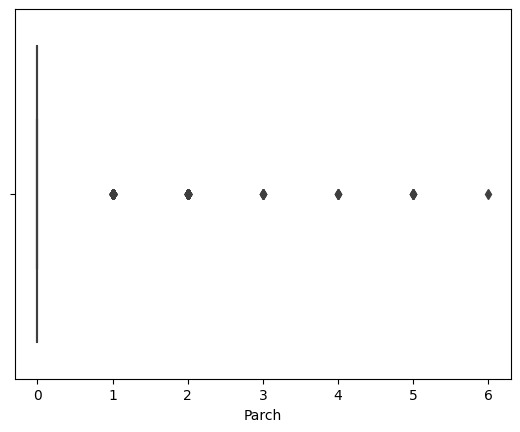

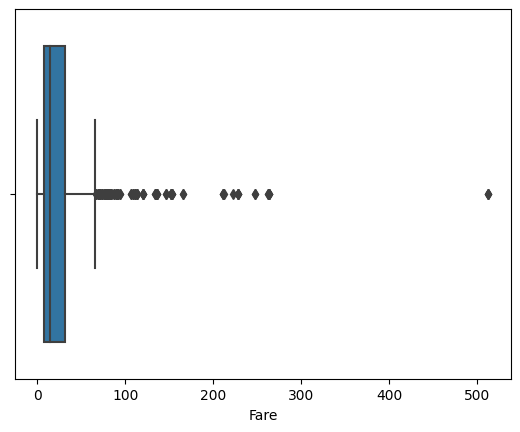

In [447]:
for i in num_cols:
    sns.boxplot(data=df_train,x=i)
    plt.show()

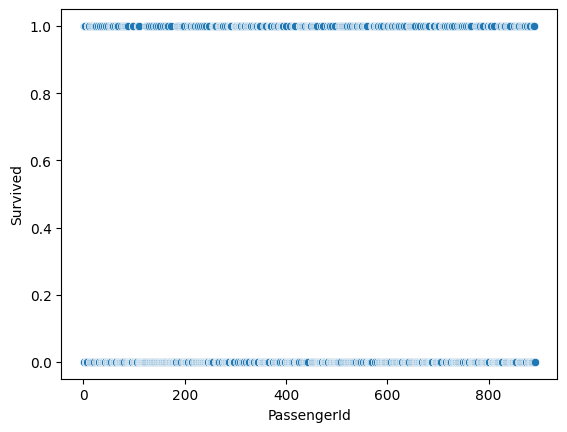

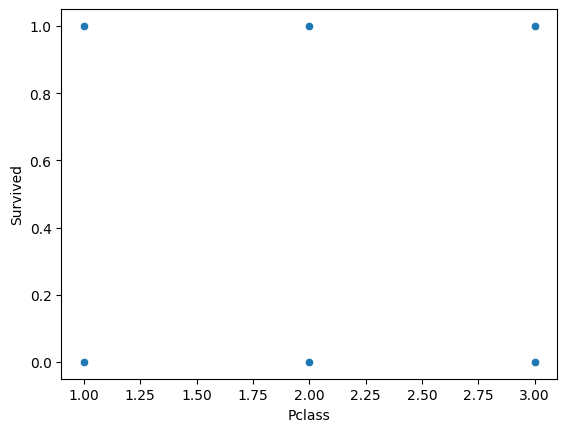

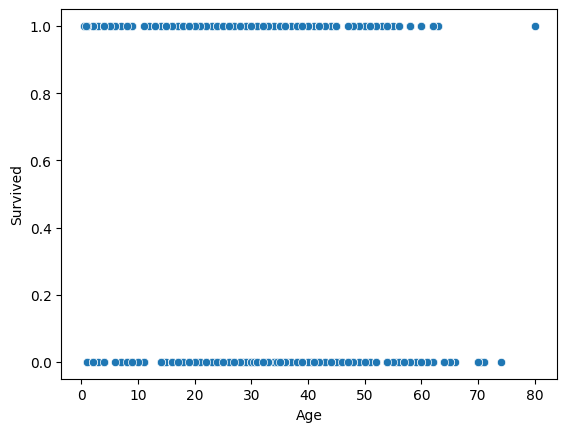

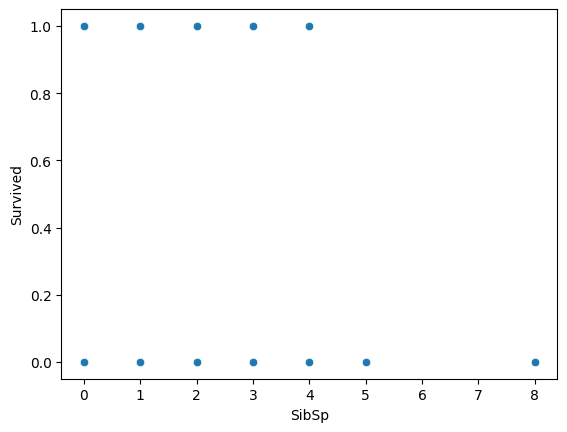

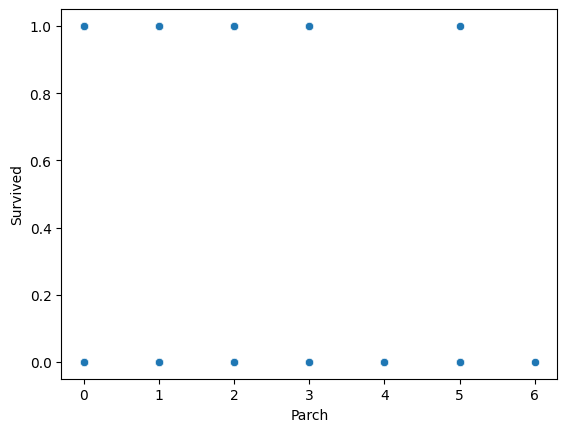

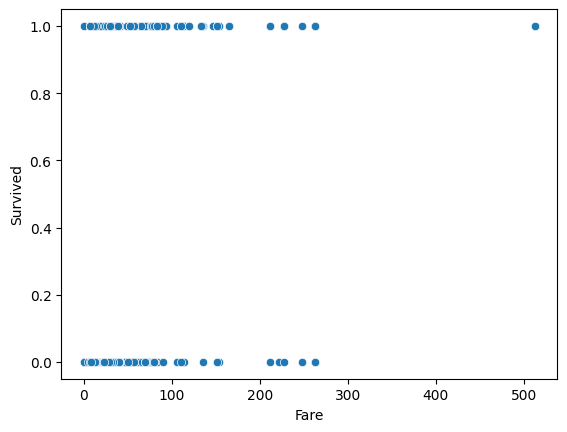

In [448]:
for i in num_cols:
    sns.scatterplot(data=df_train,x=i,y='Survived')
    plt.show()

In [449]:
df_train.select_dtypes(include='number').corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

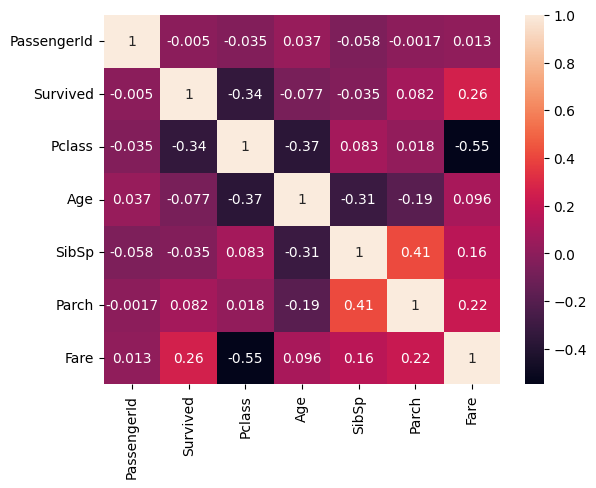

In [450]:
sns.heatmap(df_train.select_dtypes(include='number').corr(),annot=True)

# Missing Value Imputing

In [451]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [452]:
# Calculate the mean age for each Pclass, ignoring NaN values
pclass_age_means = df_train.groupby('Pclass')['Age'].mean()
# Define a function to apply the mean age based on Pclass
def impute_age_by_pclass(row, age_means):
    if pd.isnull(row['Age']):  # Check if Age is NaN
        return age_means[row['Pclass']]  # Return mean age for the respective Pclass
    else:
        return row['Age']  # If Age is not NaN, keep the existing value

# Impute missing Age values in df_train
df_train['Age'] = df_train.apply(lambda row: impute_age_by_pclass(row, pclass_age_means), axis=1)

# Repeat the same for df_test
df_test['Age'] = df_test.apply(lambda row: impute_age_by_pclass(row, pclass_age_means), axis=1)

In [453]:
from sklearn.impute import SimpleImputer
cabin_fill = SimpleImputer(fill_value='No Data',strategy='constant')
df_train['Cabin'] = cabin_fill.fit_transform(df_train['Cabin'].to_numpy().reshape(-1, 1)).ravel()
df_test['Cabin'] = cabin_fill.fit_transform(df_test['Cabin'].to_numpy().reshape(-1, 1)).ravel()

In [454]:
fare_impute = SimpleImputer(strategy='mean')
df_test['Fare'] = fare_impute.fit_transform(df_test['Fare'].to_numpy().reshape(-1, 1)).ravel()

In [455]:
for i in range(len(df_train['Cabin'])):
    cabin_value = df_train['Cabin'].loc[i]
    if cabin_value != 'No Data':
        df_train['Cabin'].loc[i] = cabin_value[0]
        
for i in range(len(df_test['Cabin'])):
    cabin_value = df_test['Cabin'].loc[i]
    if cabin_value != 'No Data':
        df_test['Cabin'].loc[i] = cabin_value[0]

# Preparing the data for modeling

In [456]:
drop_cols = ['Ticket','PassengerId','Name']

In [457]:
df_train = df_train.drop(drop_cols,axis=1)
df_test = df_test.drop(drop_cols,axis=1)

In [458]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = df_train.select_dtypes(include=['object']).columns
categorical_cols_test = df_test.select_dtypes(include=['object']).columns

In [459]:
df_train[categorical_cols] = df_train[categorical_cols].apply(lambda col: LabelEncoder().fit_transform(col))
df_test[categorical_cols_test] = df_test[categorical_cols_test].apply(lambda col: LabelEncoder().fit_transform(col))

In [460]:
X = df_train.drop('Survived',axis=1)
y = df_train.Survived
x_test = df_test

# Make The Model To Predict The Result

In [461]:
from sklearn.ensemble import RandomForestClassifier
leaderboard_model = RandomForestClassifier(criterion='gini',
                                           n_estimators=1750,
                                           max_depth=7,
                                           min_samples_split=6,
                                           min_samples_leaf=6,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=42,
                                           n_jobs=-1,
                                           verbose=1) 

In [462]:
leaderboard_model.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    4.9s finished


RandomForestClassifier(max_depth=7, max_features='auto', min_samples_leaf=6,
                       min_samples_split=6, n_estimators=1750, n_jobs=-1,
                       oob_score=True, random_state=42, verbose=1)

In [463]:
rfc = leaderboard_model.predict(x_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.7s finished


In [464]:
from xgboost import XGBClassifier

xgb_params = {
    'learning_rate': 0.01,      # Lower learning rate
    'n_estimators': 300,        # Increased estimators
    'max_depth': 4,             # Control complexity
    'subsample': 0.7,           # Randomly sample 70% of rows
    'colsample_bytree': 0.8,    # Randomly sample 80% of features per tree
    'reg_alpha': 0.01,          # L1 regularization
    'reg_lambda': 1.0,          # L2 regularization
    'random_state': 42,         # For reproducibility
    'use_label_encoder': False, # Avoid warning messages
}

xgb = XGBClassifier(**xgb_params)

In [465]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [466]:
xgb.fit(X_train,y_train)
x_predds = xgb.predict(X_test)

In [467]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,x_predds)

0.7932960893854749

In [468]:
final_mxgb = XGBClassifier(**xgb_params).fit(X,y)
final_xgb = final_mxgb.predict(x_test)

# Output 

In [469]:
pred = pd.DataFrame({
    'PassengerId':test_id,
    'Survived':final_xgb
})

In [470]:
pred.to_csv('submissioqn.csv',index=False)